# t-SNE from Scratch (ft. NumPy)

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_mnist = pd.DataFrame(mnist["data"])
y = pd.DataFrame(mnist["target"])

X_mnist = X_mnist.sample(n=1000)
y_mnist = y.loc[X_mnist.index]

X = PCA(n_components=30).fit_transform(X_mnist)

In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,861.624707,-439.582653,-725.203173,-250.620906,-328.541089,-505.671073,-438.993695,568.849765,-112.258973,39.628669,...,-27.051809,-27.654547,326.576929,318.319539,-223.275635,159.562169,-171.135407,248.380740,101.838414,127.608874
1,-245.116518,-298.176541,450.885108,312.376925,-224.418376,-467.884023,-217.139498,161.554428,261.776473,376.854554,...,156.772206,-166.702028,242.272621,-3.260708,49.543664,-301.464841,118.233737,37.727241,47.308439,279.484719
2,-187.829221,-219.219342,847.645836,172.631947,-402.701142,-214.384718,86.191400,390.736818,-300.734332,187.485151,...,283.555737,66.109973,3.567106,-91.375229,441.243738,67.130495,403.342835,-15.027750,-29.811984,195.531732
3,-373.490466,-527.686109,459.145103,650.265890,301.858557,344.774841,467.353509,-166.186541,309.411432,-93.239812,...,343.681834,96.886179,247.652638,272.581801,99.312679,160.168527,-61.394387,-299.440320,339.548892,-75.826968
4,-205.366658,-713.635608,-589.511151,-213.780359,188.437273,568.495086,-74.894194,117.254663,636.840163,131.736613,...,-158.420062,78.822198,-55.469481,118.134675,22.446523,-65.925084,-167.320671,83.574107,135.529383,134.258376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-95.283660,569.186128,4.943583,1045.298594,-44.285734,72.041165,9.058460,368.674305,222.079372,395.531772,...,61.115103,504.477675,121.452795,-103.938254,34.026269,-230.624378,66.726159,-137.230290,-190.679574,433.627179
996,-439.933827,436.107674,410.113080,-142.337423,-322.755041,25.453507,187.581026,-288.182804,634.322094,-170.687929,...,221.658611,177.331332,-17.581203,-111.277614,-216.386823,157.650979,-74.034517,-69.314360,235.696727,-134.098246
997,-940.040710,-454.078395,-71.726361,219.139315,-494.420761,-78.128085,175.575804,-86.728361,-284.325835,10.014779,...,-84.282432,-22.631631,117.826348,145.884209,55.433821,-13.494338,59.782630,-134.372337,-107.194942,-50.660434
998,-370.198105,-281.144163,870.926579,-14.345666,-108.339765,113.059450,-307.188925,87.988101,-2.715614,40.042901,...,-139.878280,-85.425638,134.390158,-259.975892,14.040580,-154.913684,268.183673,-154.668396,19.832847,133.176303


In [4]:
import tsne

X = np.array(X)

p_ij = tsne.get_original_pairwise_affinities(X)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 



In [5]:
pd.DataFrame(p_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,1.135017e-06,1.410381e-09,5.104154e-12,9.106272e-08,6.956361e-10,4.092796e-04,6.008432e-07,1.417136e-09,4.435131e-05,...,2.179411e-09,2.510154e-08,5.581881e-11,1.312394e-08,3.931643e-06,4.920252e-10,2.563143e-10,1.081655e-08,3.480750e-09,6.755646e-10
1,4.011399e-08,4.940656e-324,4.937094e-04,6.184162e-06,1.515842e-08,7.221312e-07,1.269286e-08,6.126148e-04,1.902089e-05,2.623381e-04,...,1.006736e-04,2.205230e-09,9.688663e-07,1.606976e-05,3.487434e-06,2.366191e-05,3.839089e-06,4.372219e-05,6.116157e-03,6.636836e-08
2,4.921862e-12,6.866010e-03,4.940656e-324,5.578592e-08,7.742887e-11,2.453812e-07,8.392880e-11,2.184530e-04,4.975870e-08,5.686355e-07,...,3.100936e-06,6.774198e-12,3.930032e-06,2.155219e-06,5.464804e-09,1.127782e-06,1.187223e-05,3.624107e-05,2.740811e-02,1.944620e-05
3,1.970349e-09,3.017773e-04,1.225967e-05,4.940656e-324,5.290389e-06,2.281560e-04,1.923069e-08,3.077144e-05,6.380441e-05,3.073991e-05,...,8.302573e-06,3.975441e-09,2.356311e-06,5.208784e-06,3.613574e-05,5.646238e-06,5.260542e-05,6.387774e-05,2.164317e-04,5.659872e-07
4,3.997984e-08,2.659325e-07,3.253314e-09,1.570876e-07,4.940656e-324,2.265809e-05,8.435543e-06,1.419771e-07,1.763928e-09,8.635988e-05,...,4.117702e-07,5.780992e-10,7.913878e-11,2.916806e-06,9.304776e-03,1.145973e-08,2.703941e-06,3.695095e-06,1.024368e-07,6.739773e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.018844e-11,5.029807e-04,4.587156e-06,6.382756e-08,2.497983e-09,1.636115e-09,2.661772e-13,6.850620e-05,7.997909e-06,2.071666e-04,...,1.076431e-07,5.631604e-09,6.371846e-07,3.511378e-06,3.330585e-09,4.940656e-324,7.070714e-06,1.714061e-07,1.521106e-06,1.098835e-11
996,1.130449e-16,3.574485e-08,2.251682e-08,1.431024e-09,4.934903e-10,6.527097e-11,1.736066e-15,2.244499e-05,1.020395e-09,7.625541e-08,...,5.266936e-08,4.038490e-14,2.683754e-07,5.653119e-04,1.758223e-08,2.720371e-09,4.940656e-324,3.508267e-08,5.475161e-07,2.189071e-12
997,4.387364e-28,3.987307e-14,3.225364e-16,3.693998e-19,5.013639e-20,1.172911e-05,5.056188e-30,1.180305e-13,3.939003e-20,9.803263e-11,...,3.063334e-05,6.459871e-30,1.038357e-22,1.047567e-18,1.340755e-15,1.280514e-22,7.048849e-17,4.940656e-324,8.598718e-13,4.515665e-23
998,5.064851e-14,2.656941e-03,4.249240e-04,1.425176e-07,2.779742e-11,1.850474e-06,2.305006e-15,6.498469e-06,8.506336e-09,6.405776e-08,...,1.170399e-06,1.049637e-13,2.154806e-06,2.459842e-06,2.011396e-08,2.189964e-09,2.171402e-06,1.851366e-05,4.940656e-324,7.460397e-05


In [6]:
p_ij_symmetric = tsne.get_symmetric_p_ij(p_ij)

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 



In [7]:
pd.DataFrame(p_ij_symmetric)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,5.875654e-10,7.076516e-13,9.877268e-13,6.552128e-11,3.478180e-13,3.472240e-06,3.004221e-10,7.152884e-13,2.221413e-08,...,1.089705e-12,3.998314e-09,2.791312e-14,6.561968e-12,2.695207e-09,2.511068e-13,1.281572e-13,5.408276e-12,1.740400e-12,3.409703e-13
1,5.875654e-10,4.940656e-324,3.679860e-06,1.539807e-07,1.405455e-10,3.610656e-10,2.692219e-08,3.243969e-07,1.619131e-08,1.404600e-07,...,5.033679e-08,1.061374e-08,5.313928e-10,8.037671e-09,1.402374e-08,2.633213e-07,1.937417e-09,2.186109e-08,4.386549e-06,3.926829e-10
2,7.076516e-13,3.679860e-06,4.940656e-324,6.157728e-09,1.665372e-12,1.226906e-10,2.022840e-09,1.093342e-07,3.652721e-11,2.861233e-10,...,1.550468e-09,5.536314e-10,2.019609e-09,1.077619e-09,3.045661e-11,2.857469e-09,5.947373e-09,1.812053e-08,1.391652e-05,7.802176e-08
3,9.877268e-13,1.539807e-07,6.157728e-09,4.940656e-324,2.723738e-09,1.140780e-07,1.010498e-10,1.538573e-08,3.208302e-08,1.537106e-08,...,4.151286e-09,1.682596e-11,1.178215e-09,2.604392e-09,1.890882e-08,2.855033e-09,2.630342e-08,3.193887e-08,1.082871e-07,2.832662e-10
4,6.552128e-11,1.405455e-10,1.665372e-12,2.723738e-09,4.940656e-324,1.132905e-08,2.603599e-07,7.098866e-11,9.151560e-13,4.327531e-08,...,2.058851e-10,6.303085e-10,3.961041e-14,1.458404e-09,6.543899e-06,6.978857e-12,1.352217e-09,1.847547e-09,5.123231e-11,3.579008e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.511068e-13,2.633213e-07,2.857469e-09,2.855033e-09,6.978857e-12,8.180576e-13,3.615269e-11,3.425707e-08,4.233905e-09,1.037804e-07,...,5.382154e-11,7.142077e-09,3.212120e-10,1.755691e-09,6.253932e-12,4.940656e-324,3.536717e-09,8.570306e-11,7.616479e-10,7.662013e-15
996,1.281572e-13,1.937417e-09,5.947373e-09,2.630342e-08,1.352217e-09,3.263549e-14,5.086989e-10,2.111411e-08,1.042801e-10,1.464267e-10,...,2.633468e-11,2.064671e-09,1.250259e-09,3.535996e-07,8.276140e-09,3.536717e-09,4.940656e-324,1.754134e-11,1.359459e-09,7.483939e-12
997,5.408276e-12,2.186109e-08,1.812053e-08,3.193887e-08,1.847547e-09,6.087125e-09,7.424939e-10,4.238832e-10,7.695935e-11,4.089624e-08,...,1.546494e-08,7.525499e-10,6.747169e-13,1.122104e-14,3.839030e-08,8.570306e-11,1.754134e-11,4.940656e-324,9.256832e-09,5.604938e-11
998,1.740400e-12,4.386549e-06,1.391652e-05,1.082871e-07,5.123231e-11,9.252371e-10,2.328811e-10,3.655453e-09,1.599250e-10,5.663959e-11,...,5.851997e-10,1.304704e-09,3.057261e-09,1.239057e-09,3.185754e-09,7.616479e-10,1.359459e-09,9.256832e-09,4.940656e-324,2.407644e-05


In [8]:
y0 = tsne.initialization(X, 2, "random")

In [9]:
pd.DataFrame(y0)

,0,1
0,-0.000022,0.000208
1,-0.000083,-0.000070
2,-0.000125,-0.000178
3,-0.000051,0.000057
4,-0.000081,0.000068
...,...,...
995,0.000023,-0.000013
996,-0.000006,0.000099
997,-0.000218,-0.000023
998,-0.000207,-0.000077


In [10]:
q_ij = tsne.get_low_dimensional_affinities(y0)

In [11]:
pd.DataFrame(q_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
1,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
2,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
3,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
4,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
996,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06
997,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06
998,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06


In [12]:
gradient = tsne.get_gradient(p_ij_symmetric, q_ij, y0)

In [13]:
pd.DataFrame(gradient)

,0,1
0,8.525598e-08,-3.863109e-07
1,-2.103731e-07,-3.316169e-07
2,8.634451e-08,1.930792e-07
3,-1.814527e-07,5.185631e-07
4,2.385557e-08,-6.730216e-08
...,...,...
995,-1.170912e-07,1.083464e-07
996,6.293441e-08,-7.953977e-08
997,-4.117294e-07,4.777260e-09
998,-6.196351e-07,9.591863e-08


In [14]:
# solution, Y = tsne.low_dimensional_embedding(p_ij_symmetric, y0, T=1000, η=200, early_exaggeration=4, n_dimensions=2)

In [15]:
solution, Y = tsne.tsne(
    X, perplexity=10, T=1000, η=200, early_exaggeration=4, n_dimensions=2
)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 

Optimizing Low Dimensional Embedding....
Iteration 1: Value of Cost Function is 4.436420466182705
Iteration 50: Value of Cost Function is 2.6344371946672895
Iteration 100: Value of Cost Function is 2.4013775065031093
Iteration 150: Value of Cost Function is 2.3812539310457534
Iteration 200: Value of Cost Function is 2.378568315108705
Iteration 250: Value of Cost Function is 2.3691076454134956
Iteration 300: Value of Cost Function is 1.2550711370230245
Iteration 350: Value of Cost Function is 1.1630325563194999
Iteration 400: Value of Cost Function is 1.1338755239355789
Iteration 450: Value of Cost Function is 1.120182162511167
Iteration 500: Value of Cost Function is 1.1114968567558248
Iteration 550: Value of Cost Function is 1.1049600311972854
Iteration 600: Value of Cost Function is 1.0999308881823355
Iteration 650: Value of Cost Function is

In [16]:
pd.DataFrame(solution)

,0,1
0,77.652534,201.896077
1,139.217440,43.255051
2,152.352800,-21.915308
3,34.064948,-160.011111
4,123.283512,93.778668
...,...,...
995,-106.921643,156.804071
996,-107.445369,-7.567218
997,108.386812,-196.460145
998,142.036468,-36.877247


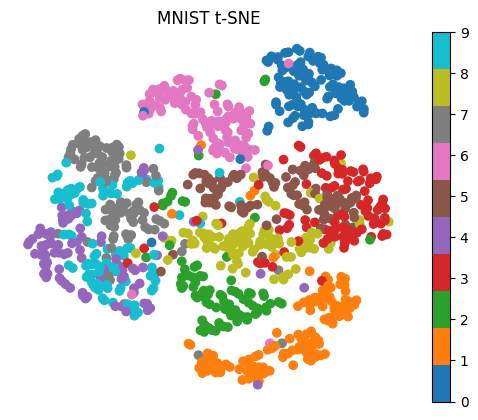

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g1 = ax.scatter(solution[:, 0], solution[:, 1], c=y_mnist, cmap="tab10")
ax.axis("off")
ax.set_title("MNIST t-SNE")
plt.colorbar(g1, ax=ax)
plt.show()

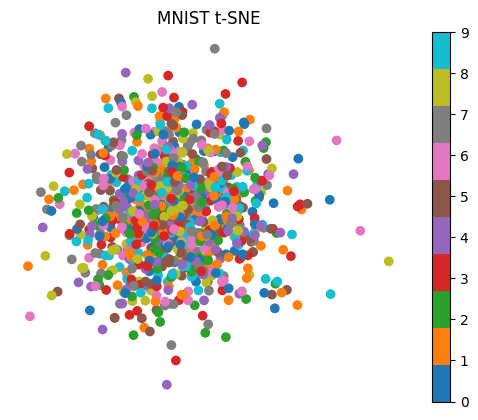

MovieWriter ffmpeg unavailable; using Pillow instead.


In [18]:
from matplotlib import animation

fig, ax = plt.subplots()
ax.axis("off")
ax.set_title("MNIST t-SNE")
scat = ax.scatter(Y[1][:, 0], Y[1][:, 1], c=y_mnist, cmap="tab10")
plt.colorbar(scat, ax=ax)
plt.show()

# t-SNE Descent Animation
ys = []
prelims = list(range(0, 50, 5))
early_range = list(range(50, 250, 10))
mid_range_1 = list(range(250, 300, 5))
mid_range_2 = list(range(300, 400, 10))
end_range = list(range(400, 1000, 50))

visual_range = (
    prelims
    + early_range
    + mid_range_1
    + mid_range_2
    + end_range
    + [999, 999, 999, 999, 999, 999, 999]
)

for i in visual_range:
    ys.append(Y[i])


def strike(text):
    result = ""
    for c in text:
        result = result + c + "\u0336"
    return result


def animate(iterations):
    scat.set_offsets(ys[iterations])
    if iterations < 31:
        ax.text(
            0.05,
            1,
            "Early Exaggeration",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )
    else:
        ax.text(
            0.05,
            1,
            strike("                  "),
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )

    ax.set_xlim(
        [1.25 * np.min(ys[iterations][:, 0]), 1.25 * np.max(ys[iterations][:, 0])]
    )
    ax.set_ylim(
        [1.25 * np.min(ys[iterations][:, 1]), 1.25 * np.max(ys[iterations][:, 1])]
    )


rot_animation = animation.FuncAnimation(
    fig, animate, frames=len(ys) - 1, interval=350, blit=False
)

rot_animation.save("MNIST.gif", dpi=250)